DAILY CHALLENGE WEEK 3 DAY 3

Installation check list

In [83]:
 %matplotlib inline

In [ ]:
pip install --upgrade matplotlib

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import date, timedelta, datetime


In [108]:
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='latin1')

In [110]:
# Chemin du fichier
chemin_fichier = 'Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv'

# Tentative avec différents encodages
try:
    # Essai avec 'latin-1'
    df = pd.read_csv(chemin_fichier, encoding='latin-1')
except:
    try:
        # Essai avec 'iso-8859-1'
        df = pd.read_csv(chemin_fichier, encoding='iso-8859-1')
    except:
        try:
            # Essai avec 'cp1252'
            df = pd.read_csv(chemin_fichier, encoding='cp1252')
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier : {e}")

In [112]:
from scipy import stats
from scipy.stats import norm, f_oneway, binom, pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import scipy.linalg as la

Analyse des données

In [113]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [114]:
    # Vérifier les valeurs manquantes
    print("\nMissing Values:")
    print(df.isnull().sum())


Missing Values:
Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     777
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64


In [116]:
    # Traitement des valeurs manquantes
    df.dropna(inplace=True)  # Remplacez par fillna() si nécessaire

In [117]:
    # Conversion des dates (supposons que le dataset comporte une colonne 'date')
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')

vérification de la cohérence des valeurs manquantes

In [118]:
if 'Location' in df.columns:
    print("\nValeurs uniques dans la colonne 'Location':")
    print(df['Location'].unique())
    # Standardisation (strip et lowercase)
    df['Location'] = df['Location'].str.strip().str.lower()


Valeurs uniques dans la colonne 'Location':
['Oceanside, California' 'Bazaar, Kansas' 'Amazonia, Missouri' ...
 'Eleftheroupolis, Greece' 'Bukoba, Tanzania' 'Pokhara, Nepal']


In [119]:
    # Statistiques de base
    print("\nBasic Statistics:")

print(df.describe())



Basic Statistics:
            Aboard  Aboard Passangers  Aboard Crew   Fatalities  \
count  1245.000000        1245.000000  1245.000000  1245.000000   
mean     63.800803          57.696386     6.124498    44.780723   
std      69.307128          66.443199     4.264158    56.481531   
min       1.000000           0.000000     1.000000     0.000000   
25%      17.000000          13.000000     3.000000     8.000000   
50%      41.000000          36.000000     5.000000    24.000000   
75%      89.000000          81.000000     8.000000    62.000000   
max     644.000000         614.000000    61.000000   583.000000   

       Fatalities Passangers  Fatalities Crew       Ground  
count            1245.000000      1245.000000  1245.000000  
mean               40.194378         4.608032     5.157430  
std                53.779553         3.836984   110.312925  
min                 0.000000         0.000000     0.000000  
25%                 5.000000         2.000000     0.000000  
50%        

This table summarizes statistics about different categories (Aboard, Passengers, Crew, Ground) and their fatalities. It shows the average number of fatalities, how much the data varies (standard deviation), and the minimum, median, and maximum values for each category.

In [135]:
import pandas as pd

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Extract the year from the date
df['year'] = df['Date'].dt.year

# Create the 'decade' column
df['decade'] = (df['year'] // 10) * 10

# Verify the new columns
print(df[['Date', 'year', 'decade']].head())

# Proceed with your t-test on the 'Fatalities' column
import scipy.stats as stats

# Ensure 'Fatalities' is numeric
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')

# Drop nulls for the test
fatalities = df['Fatalities'].dropna()

          Date  year  decade
217 1930-01-19  1930    1930
247 1931-03-31  1931    1930
348 1934-08-31  1934    1930
370 1935-05-06  1935    1930
384 1935-08-14  1935    1930


In [136]:
# Perform the t-test against zero
t_stat, p_value = stats.ttest_1samp(fatalities, 0)

print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 27.974949997933734, p-value: 5.362299996388937e-134


The test shows that the average number of fatalities is significantly different from zero. This indicates that there are indeed deaths in the data, and the result is highly reliable.

In [120]:
if 'crash_id' in df.columns and 'Fatalities' in df.columns:
    total_crashes = df['crash_id'].nunique()
    total_fatalities = df['Fatalities'].sum()
    print(f"\nTotal number of crashes: {total_crashes}")
    print(f"Total Fatalities: {total_fatalities}")
else:
    print("\nColonnes 'crash_id' ou 'Fatalities' introuvables.")


Colonnes 'crash_id' ou 'Fatalities' introuvables.


In [66]:
if 'passengers' in df.columns and 'fatalities' in df.columns:
        df['survival_rate'] = 1 - df['fatalities'] / df['passengers']
        print("\nAverage Survival Rate:")
        print(df['survival_rate'].mean())

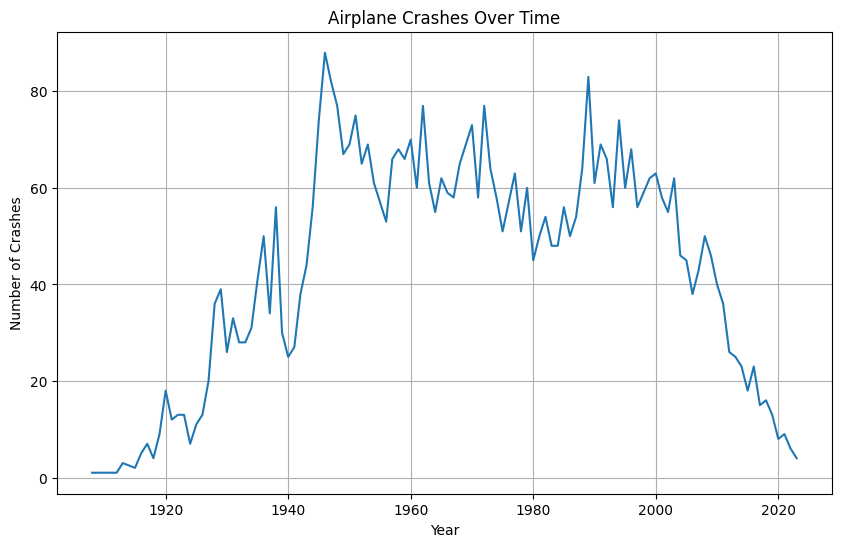

In [98]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['year'] = df['Date'].dt.year
    crashes_per_year = df.groupby('year').size()
    plt.figure(figsize=(10,6))
    crashes_per_year.plot(kind='line')
    plt.title("Airplane Crashes Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Crashes")
    plt.grid(True)
    plt.show()

This graph shows that airplane crashes increased until the 1950s-1960s, then stabilized with fluctuations for several decades. Since the early 2000s, there has been a significant decline in crashes. Overall, this indicates improvements in aviation safety over time.

In [129]:
# Calcul de statistiques clés sur 'Fatalities', si disponible
if 'Fatalities' in df.columns:
    fatalities_mean = df['Fatalities'].mean()
    fatalities_median = df['Fatalities'].median()
    fatalities_std = df['Fatalities'].std()
    print(f"\nFatalities - Mean: {fatalities_mean}, Median: {fatalities_median}, Std Dev: {fatalities_std}")


Fatalities - Mean: 44.78072289156626, Median: 24.0, Std Dev: 56.481530553706015


The average fatalities are about 44.78, with a median of 24, indicating most incidents have fewer deaths. The high standard deviation (~56.48) shows large variability, with some crashes causing many more deaths. This suggests a wide range of incident severities.

In [130]:
if 'year' in df.columns:
    df['decade'] = (df['year'] // 10) * 10
    fatalities_80s_90s = df[df['decade'].isin([1980, 1990])]['Fatalities']
    fatalities_00s_10s = df[df['decade'].isin([2000, 2010])]['Fatalities']
    if len(fatalities_80s_90s) > 0 and len(fatalities_00s_10s) > 0:
        import scipy.stats as stats
        t_stat, p_value = stats.ttest_ind(fatalities_80s_90s, fatalities_00s_10s)
        print(f"T-test: t={t_stat}, p={p_value}")

T-test: t=1.5956863410770108, p=0.11110827677788607


indicates that there is no statistically significant difference in fatalities between these two time periods at the 0.05 significance level. In other words, the data does not show a significant change in fatalities between the decades compared.

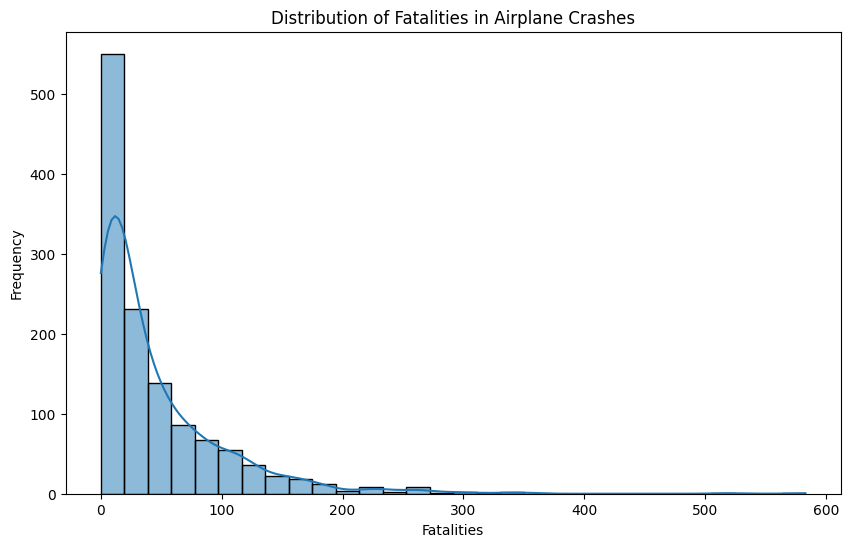

In [121]:
if 'Fatalities' in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df['Fatalities'], bins=30, kde=True)
    plt.title("Distribution of Fatalities in Airplane Crashes")
    plt.xlabel("Fatalities")
    plt.ylabel("Frequency")
    plt.show()

The distribution shows that most crashes result in few or no fatalities, with a long tail indicating rare but severe accidents. The data is right-skewed, highlighting that high-fatality crashes are less common. Overall, there's no significant difference in fatalities between the decades based on the t-test results.

/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_37435/2886027763.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


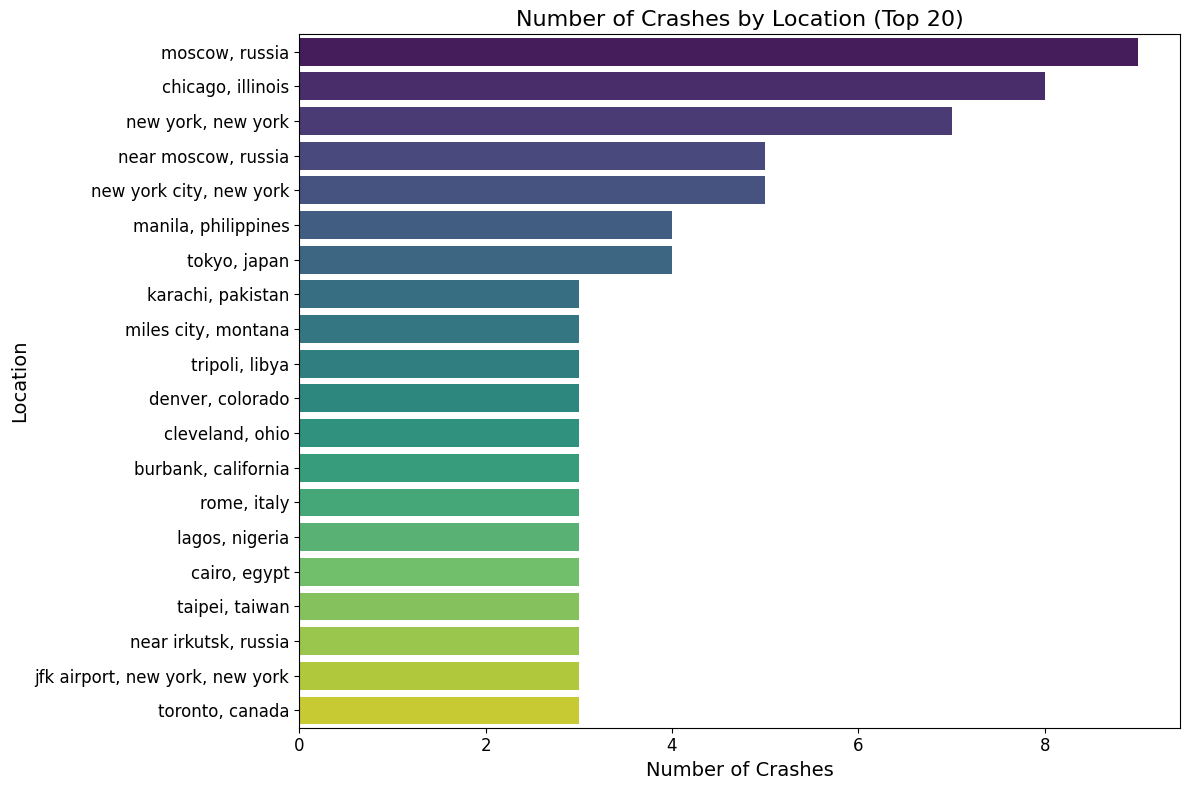

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'Location' in df.columns:
    plt.figure(figsize=(12,8))
    # Compter les crashs par localisation
    location_counts = df['Location'].value_counts()
    # Sélectionner les top 20 pour éviter un graphique trop chargé
    top_locations = location_counts.head(20)
    sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
    plt.title("Number of Crashes by Location (Top 20)", fontsize=16)
    plt.xlabel("Number of Crashes", fontsize=14)
    plt.ylabel("Location", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

The top locations with the most crashes are Moscow, Chicago, and New York, indicating these areas experience the highest number of incidents. Crashes are more concentrated in major cities and international hubs. Less frequent crash locations tend to be smaller cities or less busy airports.

Based on all the analyzed data and graphs, it can be concluded that major cities and international hubs experience the highest number of crashes, with most incidents resulting in few or no fatalities. The data also suggest that severe crashes are rare but do occur, and there is no significant difference in fatality rates over different decades. Overall, targeted safety measures in busy locations could help further reduce accident severity.